# Import

In [520]:
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import fftpack
from scipy import spatial
import sys
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import xlsxwriter



In [2]:
# Abrir el archivo...
audio, samplerate = sf.read('Cata-vanesa-2.wav')
print(audio.shape[0]) 
print(samplerate)
# Y reproducirlo...
Audio(audio, rate=samplerate)

48736
48000


# Corte del audio

In [3]:
N_e = 721
t_silencio = 0.1
audio_abs = abs(audio)
B_e = signal.firwin(N_e, cutoff = 20, window  = 'hamming', fs = samplerate)
A_e = np.zeros(N_e)
A_e[0] = 1
energy  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_e, 𝙰_e, audio_abs)
ITU = np.mean(energy[0:int(t_silencio*samplerate)])*4 
ITL = np.mean(energy[0:int(t_silencio*samplerate)])*1.5

In [4]:
N_s = N_e
sgn = np.sign(audio)
sgn_shift = np.roll(sgn,-1)
sgn_shift[len(sgn)-1] = 0
sgn_abs = abs(sgn-sgn_shift)
B_s = signal.firwin(N_s, cutoff = 10, window = 'hamming', fs = samplerate)
A_s = np.zeros(N_s)
A_s[0] = 1
zero_c  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_s, 𝙰_s, sgn_abs)
IZCT = np.mean(zero_c[0:int(t_silencio*samplerate)])*2 #Promedio del ruido

<IPython.core.display.Javascript object>


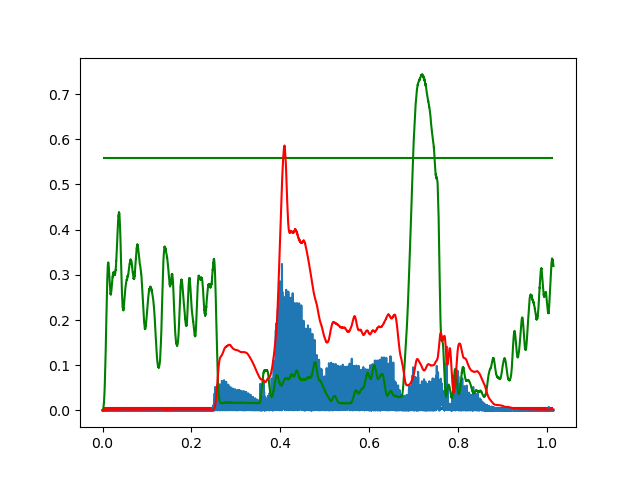

In [5]:
%matplotlib notebook

t = np.linspace(0, len(audio_abs)/samplerate, len(audio_abs))
plt.plot(t, audio_abs)
plt.plot(t, zero_c,'g')
plt.plot(t, energy*5, 'r')
plt.hlines(ITU*5, 0, len(audio_abs)/samplerate, 'r') #ITU
plt.hlines(ITL*5, 0, len(audio_abs)/samplerate, 'r') #ITL
plt.hlines(IZCT, 0, len(audio_abs)/samplerate, 'g')

In [6]:
#Encontrar Limites internos con ILU
N1U = 0
N2U = 0
for i in range(len(audio_abs)):
    if energy[i]>ITU:
        N1U = i
        break
print(N1U)        
for i in reversed(range(len(audio_abs))):
    if energy[i]>ITU:
        N2U = i
        break
print(N2U)
#Encontrar limites externos
for i in reversed(range(0,N1U)):
    if energy[i]<ITL:
        N1U = i
        break
print(N1U)
for i in range(N2U,len(audio_abs)):
    if energy[i]<ITL:
        N2U = i
        break
print(N2U)

for i in reversed(range(0,N1U)):
    if zero_c[i]<IZCT:
        N1U = i
        break
print(N1U)
for i in range(N2U,len(audio_abs)):
    if zero_c[i]<IZCT:
        N2U = i
        break
print(N2U)


12118
44215
12019
46524
12018
46524


<IPython.core.display.Javascript object>


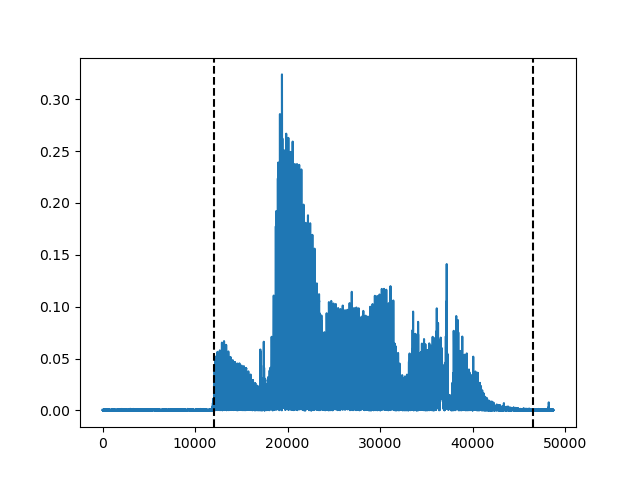

In [7]:
%matplotlib notebook

plt.plot(audio_abs)
#plt.plot(zero_c,'g')
#plt.plot(energy*5, 'r')
plt.axvline(x=N1U, color='k', linestyle='--')
plt.axvline(x=N2U, color='k', linestyle='--')

In [8]:
audio_cut = audio[N1U:N2U]
Audio(audio_cut, rate=samplerate)

<IPython.core.display.Javascript object>


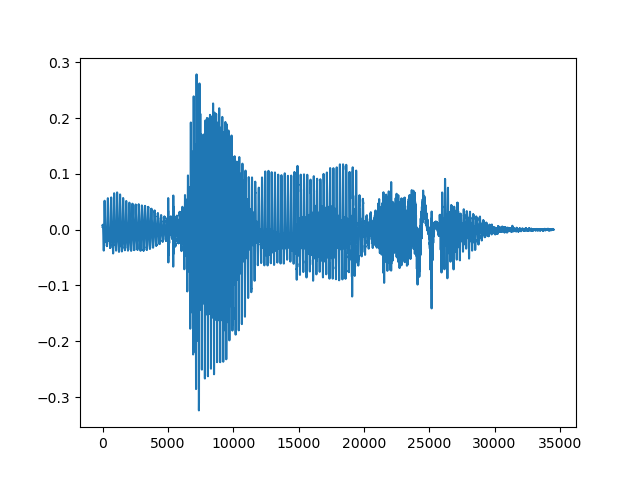

In [9]:
%matplotlib notebook

plt.plot(audio_cut)

In [10]:
 # Función completa sin plots
def recorte(nombre_audio, N, t):
    audio, samplerate = sf.read(nombre_audio)
    
    audio_abs = abs(audio)
    B_e = signal.firwin(N, cutoff = 20, window  = 'hamming', fs = samplerate)
    A_e = np.zeros(N)
    A_e[0] = 1
    energy  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_e, 𝙰_e, audio_abs)
    ITU = np.mean(energy[0:int(t*samplerate)])*4 
    ITL = np.mean(energy[0:int(t*samplerate)])*1.5
    
    sgn = np.sign(audio)
    sgn_shift = np.roll(sgn,-1)
    sgn_shift[len(sgn)-1] = 0
    sgn_abs = abs(sgn-sgn_shift)
    B_s = signal.firwin(N, cutoff = 10, window = 'hamming', fs = samplerate)
    A_s = np.zeros(N)
    A_s[0] = 1
    zero_c  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_s, 𝙰_s, sgn_abs)
    IZCT = np.mean(zero_c[0:int(t*samplerate)])*2 #Promedio del ruido
    
    N1U = 0
    N2U = 0
    for i in range(len(audio_abs)):
        if energy[i]>ITU:
            N1U = i
            break
      
    for i in reversed(range(len(audio_abs))):
        if energy[i]>ITU:
            N2U = i
            break

    #Encontrar limites externos
    for i in reversed(range(0,N1U)):
        if energy[i]<ITL:
            N1U = i
            break

    for i in range(N2U,len(audio_abs)):
        if energy[i]<ITL:
            N2U = i
            break


    for i in reversed(range(0,N1U)):
        if zero_c[i]<IZCT:
            N1U = i
            break

    for i in range(N2U,len(audio_abs)):
        if zero_c[i]<IZCT:
            N2U = i
            break
    
    audio_cut = audio[N1U:N2U]
    return audio_cut, N1U, N2U


<IPython.core.display.Javascript object>


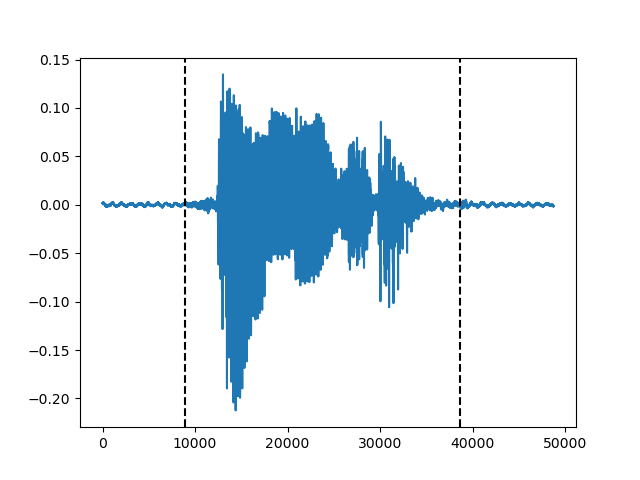

In [11]:
# Test
%matplotlib notebook

cata_vanesa, samplerate = sf.read('Cata-vanesa-1.wav')
cata_vanesa_cut, N1U_c, N2U_c = recorte('Cata-vanesa-1.wav', 721, 0.1)

#plt.plot(cata_vanesa_cut)
plt.plot(cata_vanesa)
plt.axvline(x=N1U_c, color='k', linestyle='--')
plt.axvline(x=N2U_c, color='k', linestyle='--')
Audio(cata_vanesa, rate=samplerate)

# Remuestreo ?????

In [61]:
fc = 3000
def remuestreo(Fs_vieja, Fs_nueva, audio_cut):
    #B_r = signal.firwin(255, cutoff = 8000, window  = 'flattop', fs = Fs_vieja) #3000 para señal normal
    #A_r = np.zeros(255)
    #A_r[0] = 1
    
    Ap = 0.5
    As = 40
    dp=(10**(Ap/20)-1)/(10**(Ap/20)+1)
    ds=(1+dp)/10**(As/20)
    K=dp/ds
    B_r = signal.remez(83, [0,7000, 8000 ,24000], [1.005,0.01], weight=[1,K], fs = Fs_vieja)
    A_r = np.zeros(83)
    A_r[0] = 1
    
    audio_aa  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_r, 𝙰_r, audio_cut)
    audio_down = np.zeros(int(len(audio_aa)/(Fs_vieja/Fs_nueva))+1)
    
    #Nuevo Fs = 8kHz
    for i in range(0, len(audio_aa), int(Fs_vieja/Fs_nueva)):
        k = int(i/int(Fs_vieja/Fs_nueva))
        audio_down[k] = audio_aa[i]
        
    return audio_down



# Pre-énfasis

In [298]:
def pre_enf(audio):
    #B_r = signal.firwin(5, cutoff = Fs/4, window  = 'flattop', fs = Fs_vieja) #3000 para señal normal
    # Filtro diseñado con PYFDAX con f_sb 1.6, f_pb 8000, A_sb 6.94, A_pb 0.5, Kaiser beta 7
    #B_e = [-4.5117942596092e-19, -0.1747787333384468, 0.6504425333231064, -0.1747787333384468, -4.5117942596092e-19]
    
    # Filtro diseñado con PYFDAX con f_sb 1.6, f_pb 8000, A_sb 6.94, A_pb 0.5, Kaiser beta 4
    B_e = [-5.7278213768295986e-18, -0.22322329142142205, 0.5535534171571559, -0.22322329142142205, -5.7278213768295986e-18]
    
    A_r = np.zeros(5)
    A_r[0] = 1
    
    audio_enf  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_e, 𝙰_e, audio)
    return audio_enf

# Time warp!!!

In [299]:

def audios_matched(x, y): #audios_down
    
    distance, path = fastdtw(x, y, dist=euclidean)
    x_match = np.zeros(len(path))
    y_match = np.zeros(len(path))
    for i in range(len(path)):
        x_match[i] = x[path[i][0]]
        y_match[i] = y[path[i][1]]
    return x_match, y_match

## Test

cata_vanesa_cut, N1U_c, N2U_c = recorte('Cata-bianca-1.wav', 721, 0.1)
isi_vanesa_cut, N1U_c, N2U_c = recorte('Cata-bianca-2.wav', 721, 0.1)

cata_vanesa_down = remuestreo(samplerate, 16000, cata_vanesa_cut)
isi_vanesa_down = remuestreo(samplerate, 16000, isi_vanesa_cut)

norm_cata= np.linalg.norm(cata_vanesa_down)
norm_isi= np.linalg.norm(isi_vanesa_down)

#cata_vanesa_match, isi_vanesa_match = audios_matched(cata_vanesa_down/norm_cata, isi_vanesa_down/norm_isi)
#cata_vanesa_match, isi_vanesa_match = audios_matched(cata_vanesa_down, isi_vanesa_down)
#print(isi_vanesa_cut)

#audio_prueba = remuestreo(samplerate,8000, cata_vanesa_cut)


In [29]:
Audio(isi_vanesa_match, rate=16000)

print(len(isi_vanesa_down))
print(len(isi_vanesa_match))

9436
13898


<IPython.core.display.Javascript object>


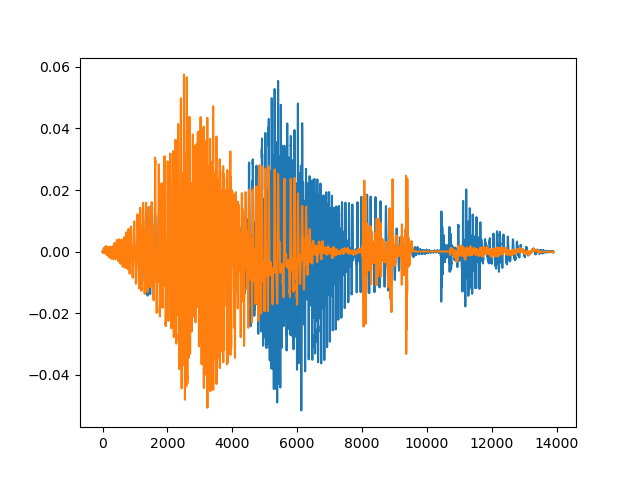

In [262]:
%matplotlib notebook

plt.plot(isi_vanesa_match)
plt.plot(cata_vanesa_match)



# Filtros de Mel

In [62]:
def hz_to_mel(f):
    return 1125*np.log(1+f/700)

def mel_to_hz(mel):
    return 700*(np.exp(mel/1125)-1)


<IPython.core.display.Javascript object>


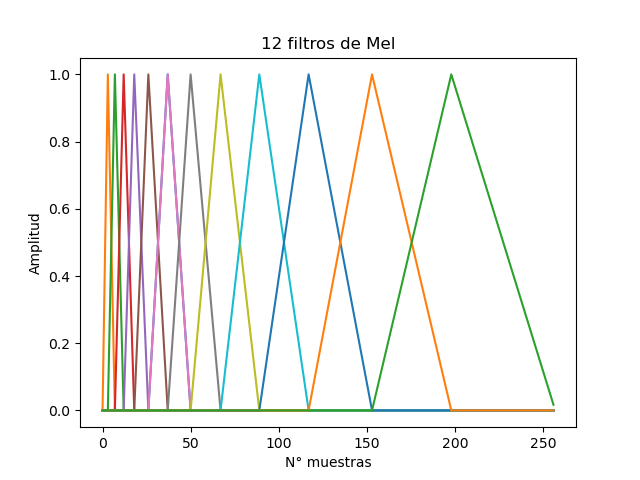

12

In [320]:
%matplotlib notebook
# Calculo de los filtros
# Retorna matriz pxM 
n_filtros = 12
n_fft = 512 #potencia de 2
Fs = samplerate/3
hz_min = 0
hz_max = Fs #hasta la max frecuencia

def filtros_mel(n_filtros, n_fft, Fs, hz_min, hz_max):
    
    mel_min = hz_to_mel(hz_min)
    mel_max = hz_to_mel(hz_max)
    mels = np.linspace(mel_min, mel_max, n_filtros + 2) #2 más por los extremos por la definición de los filtros
    hertz = mel_to_hz(mels)
    f_m = hertz*(1+n_fft/2)/Fs # N/Fs = 1/U donde U es el espacio discreto entre frecuencias, 1/U es la frec de muestreo en las frecuencias
    #f_m = hertz*n_fft/Fs #Frec bin f[m], cuentan los de posicion 1 a 12, 0 y 13 son extremos
    f_m = f_m.astype(int) # ?????????????????
    filtros = np.zeros([int(1+n_fft/2), n_filtros]) #n_fft filas, n_filtros columnas
    for m in range(1, n_filtros+1):
        for k in range(int(1+n_fft/2)):
            if k<f_m[m-1]:
                filtros[k,m-1] = 0
            elif k>=f_m[m-1] and k<f_m[m]:
                filtros[k,m-1] = (k-f_m[m-1])/(f_m[m]-f_m[m-1])
                #print((k-f_m[m-1])/(f_m[m]-f_m[m-1]))
            elif k>=f_m[m] and k<f_m[m+1]:
                filtros[k,m-1] = (f_m[m+1]-k)/(f_m[m+1]-f_m[m])
            elif k>=f_m[m+1]:
                filtros[k,m-1] = 0
    return filtros        


filtros_test = filtros_mel(n_filtros, n_fft, Fs, hz_min, hz_max)
plt.plot(filtros_test[:,5])
for i in range(n_filtros):
    plt.plot(filtros_test[:,i]) 

plt.ylabel('Amplitud')
plt.xlabel('N° muestras')
plt.title('12 filtros de Mel')
plt.savefig('Filtros de Mel.png')
len(filtros_test[0])

# Cálculo de coeficientes

In [301]:
%matplotlib notebook
def mfcc(audio_match, Fs, n_filtros, n_fft, hz_min, hz_max):

    #audio_prueba es el audio cortado y resampleado
    N_ham = int(0.025*Fs) #ventana de 0.025s
    N_skip = int(0.01*Fs) #traslape de 0.010s
    f, t, Sxx = signal.spectrogram(audio_match, Fs, window = 'hamming', nperseg = N_ham, noverlap = N_skip, nfft = n_fft)
    #plt.pcolormesh(t, f, Sxx, shading='gouraud')
    #plt.ylabel('Frequency [Hz]')
    #plt.xlabel('Time [sec]')
    #plt.show()
    Sxx_t = Sxx.T # TxM/2
    
    filtros = filtros_mel(n_filtros, n_fft, Fs, hz_min, hz_max)
    

    Y = Sxx_t.dot(filtros)
    Y = np.log10(Y) #Txp
    x = fftpack.dct(Y, norm = 'ortho') #Txp
    x = x[:,1:12] #eliminamos el primer coeficiente
    
    #plt.pcolormesh(x.T, shading='gouraud')
    #plt.ylabel('Coeficientes')
    #plt.xlabel('Frames')
    #plt.show()

    return x



In [302]:
# Test

mel_cata_vanesa = mfcc(cata_vanesa_down, Fs, n_filtros, n_fft, hz_min, hz_max)
#mel_isi_vanesa = mfcc(isi_vanesa_down, Fs, n_filtros, n_fft, hz_min, hz_max)


#Eliminar los nan
nonan_cata_vanesa = mel_cata_vanesa[np.logical_not(np.isnan(mel_cata_vanesa))]
nonan_isi_vanesa = mel_isi_vanesa[np.logical_not(np.isnan(mel_isi_vanesa))]



# Cálculo de distancias

In [303]:
%matplotlib notebook
def distancia(mel_matrix_1, mel_matrix_2, metrica):
    nonan_1 = mel_matrix_1[np.logical_not(np.isnan(mel_matrix_1))]
    nonan_2 = mel_matrix_2[np.logical_not(np.isnan(mel_matrix_2))]
    final_1 = np.reshape(nonan_1, (int(len(nonan_1)/11), 11))
    final_2 = np.reshape(nonan_2, (int(len(nonan_2)/11), 11))
    dist = spatial.distance.cdist(final_1, final_2, metric = metrica)
    sum_dist = np.trace(dist)
    #sum_dist = sum_dist + np.trace(dist, offset = 1)*0.4
    #sum_dist = sum_dist + np.trace(dist, offset = -1)*0.4
    #sum_dist = sum_dist + np.trace(dist, offset = 2)*0.3
    #sum_dist = sum_dist + np.trace(dist, offset = -2)*0.3
    plt.pcolormesh(dist, shading='gouraud')
    plt.ylabel('Frames')
    plt.xlabel('Frames')
    return sum_dist


<IPython.core.display.Javascript object>


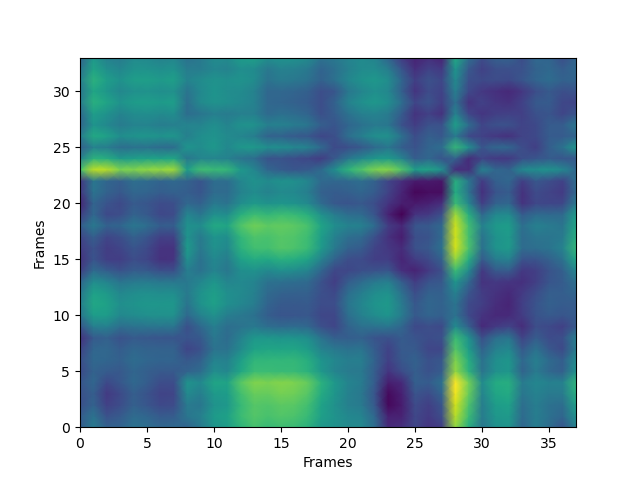

121.12030991163456


In [304]:
# Test

%matplotlib notebook
hola = distancia(mel_cata_vanesa, mel_isi_vanesa, 'euclidean')
print(hola)


# Final

In [540]:
%matplotlib notebook

samplerate = 48000
N = 721
t = 0.1
n_filtros = 12
n_fft = 512 #potencia de 2
Fs = samplerate/3
hz_min = 0
hz_max = Fs #hasta la max frecuencia

def recorte(nombre_audio, N, t):
    audio, samplerate = sf.read(nombre_audio)
    
    audio_abs = abs(audio)
    B_e = signal.firwin(N, cutoff = 20, window  = 'hamming', fs = samplerate)
    A_e = np.zeros(N)
    A_e[0] = 1
    energy  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_e, 𝙰_e, audio_abs)
    ITU = np.mean(energy[0:int(t*samplerate)])*4 
    ITL = np.mean(energy[0:int(t*samplerate)])*1.5
    
    sgn = np.sign(audio)
    sgn_shift = np.roll(sgn,-1)
    sgn_shift[len(sgn)-1] = 0
    sgn_abs = abs(sgn-sgn_shift)
    B_s = signal.firwin(N, cutoff = 10, window = 'hamming', fs = samplerate)
    A_s = np.zeros(N)
    A_s[0] = 1
    zero_c  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_s, 𝙰_s, sgn_abs)
    IZCT = np.mean(zero_c[0:int(t*samplerate)])*1 #Promedio del ruido ANTES ERA 2
    
#     fig1, ax1 = plt.subplots()
#     t = np.linspace(0, len(audio_abs)/samplerate, len(audio_abs))
#     ax1.plot(t, audio_abs)
#     ax1.plot(t, zero_c,'g')
#     ax1.plot(t, energy*5, 'r')
#     ax1.hlines(ITU*5, 0, len(audio_abs)/samplerate, 'r') #ITU
#     ax1.hlines(ITL*5, 0, len(audio_abs)/samplerate, 'r') #ITL
#     ax1.hlines(IZCT, 0, len(audio_abs)/samplerate, 'g')
#     ax1.set_title('Energía y cruces por cero de: %s' % (nombre_audio))
#     ax1.set_xlabel('Tiempo (s)')
#     ax1.set_ylabel('Amplitud')
#     nombre_audio_sinwav = nombre_audio.replace('.wav','')
#     nombre_audio_sinwav = 'Energía y cruces por cero de %s' % (nombre_audio_sinwav) + '.png'
#     fig1.savefig(nombre_audio_sinwav)
#     plt.show()
    
    N1U = 0
    N2U = 0
    for i in range(len(audio_abs)):
        if energy[i]>ITU:
            N1U = i
            break
      
    for i in reversed(range(len(audio_abs))):
        if energy[i]>ITU:
            N2U = i
            break

    #Encontrar limites externos
    for i in reversed(range(0,N1U)):
        if energy[i]<ITL:
            N1U = i
            break

    for i in range(N2U,len(audio_abs)):
        if energy[i]<ITL:
            N2U = i
            break


    for i in reversed(range(0,N1U)):
        if zero_c[i]<IZCT:
            N1U = i
            break

    for i in range(N2U,len(audio_abs)):
        if zero_c[i]<IZCT:
            N2U = i
            break
    
    audio_cut = audio[N1U:N2U]
    
#     fig2, ax2 = plt.subplots()
#     ax2.plot(audio)
#     ax2.axvline(x=N1U, color='k', linestyle='--')
#     ax2.axvline(x=N2U, color='k', linestyle='--')
#     ax2.set_title('Cortes de %s' % (nombre_audio))
#     ax2.set_xlabel('Muestras')
#     ax2.set_ylabel('Amplitud')
#     nombre_audio_sinwav = nombre_audio.replace('.wav','')
#     nombre_audio_sinwav = 'Cortes de %s' % (nombre_audio_sinwav) + '.png'
#     fig2.savefig(nombre_audio_sinwav)
#     plt.show()

    return audio_cut, N1U, N2U


def remuestreo(Fs_vieja, Fs_nueva, audio_cut, nombre_audio):
    #B_r = signal.firwin(255, cutoff = 8000, window  = 'flattop', fs = Fs_vieja) #3000 para señal normal
    #A_r = np.zeros(255)
    #A_r[0] = 1
    
    f_1, t_1, Sxx_1 = signal.spectrogram(audio_cut, Fs_vieja, window = 'hamming')
#     fig3, ax3 = plt.subplots()
#     ax3.pcolormesh(t_1, f_1, 10*np.log(Sxx_1), shading='gouraud')
#     ax3.set_title('Espectrograma pre-remuestreo de %s' % (nombre_audio))
#     ax3.set_ylabel('Frequency [Hz]')
#     ax3.set_xlabel('Time [sec]')
#     nombre_audio_sinwav = nombre_audio.replace('.wav','')
#     nombre_audio_sinwav = 'Espectrograma pre-remuestreo de %s' % (nombre_audio_sinwav) + '.png'
#     fig3.savefig(nombre_audio_sinwav)
#     plt.show()
    
    Ap = 0.5
    As = 40
    dp=(10**(Ap/20)-1)/(10**(Ap/20)+1)
    ds=(1+dp)/10**(As/20)
    K=dp/ds
    B_r = signal.remez(83, [0,7000, 8000 ,24000], [1.005,0.01], weight=[1,K], fs = Fs_vieja)
    A_r = np.zeros(83)
    A_r[0] = 1
    
    audio_aa  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_r, 𝙰_r, audio_cut)
    audio_down = np.zeros(int(len(audio_aa)/(Fs_vieja/Fs_nueva))+1)
    
    #Nuevo Fs = 8kHz
    for i in range(0, len(audio_aa), int(Fs_vieja/Fs_nueva)):
        k = int(i/int(Fs_vieja/Fs_nueva))
        audio_down[k] = audio_aa[i]
        
    f_2, t_2, Sxx_2 = signal.spectrogram(audio_down, Fs_nueva, window = 'hamming')
#     fig4, ax4 = plt.subplots()
#     ax4.pcolormesh(t_2, f_2, 10*np.log(Sxx_2), shading='gouraud')
#     ax4.set_title('Espectrograma post-remuestreo de %s' % (nombre_audio))
#     ax4.set_ylabel('Frequency [Hz]')
#     ax4.set_xlabel('Time [sec]')
#     nombre_audio_sinwav = nombre_audio.replace('.wav','')
#     nombre_audio_sinwav = 'Espectrograma post-remuestreo de %s' % (nombre_audio_sinwav) + '.png'
#     fig4.savefig(nombre_audio_sinwav)
#     plt.show()
        
    return audio_down


def pre_enf(audio):
    #B_r = signal.firwin(5, cutoff = Fs/4, window  = 'flattop', fs = Fs_vieja) #3000 para señal normal
    # Filtro diseñado con PYFDAX con f_sb 1.6, f_pb 8000, A_sb 6.94, A_pb 0.5, Kaiser beta 7
    #B_e = [-4.5117942596092e-19, -0.1747787333384468, 0.6504425333231064, -0.1747787333384468, -4.5117942596092e-19]
    
    # Filtro diseñado con PYFDAX con f_sb 1.6, f_pb 8000, A_sb 6.94, A_pb 0.5, Kaiser beta 4
    B_e = [-5.7278213768295986e-18, -0.22322329142142205, 0.5535534171571559, -0.22322329142142205, -5.7278213768295986e-18]
    
    A_r = np.zeros(5)
    A_r[0] = 1
    
    audio_enf  = 𝚜𝚒𝚐𝚗𝚊𝚕.𝚕𝚏𝚒𝚕𝚝𝚎𝚛 (𝙱_e, 𝙰_e, audio)
    return audio_enf


def hz_to_mel(f):
    return 1125*np.log(1+f/700)

def mel_to_hz(mel):
    return 700*(np.exp(mel/1125)-1)


def filtros_mel(n_filtros, n_fft, Fs, hz_min, hz_max):
    
    mel_min = hz_to_mel(hz_min)
    mel_max = hz_to_mel(hz_max)
    mels = np.linspace(mel_min, mel_max, n_filtros + 2) #2 más por los extremos por la definición de los filtros
    hertz = mel_to_hz(mels)
    f_m = hertz*(1+n_fft/2)/Fs # N/Fs = 1/U donde U es el espacio discreto entre frecuencias, 1/U es la frec de muestreo en las frecuencias
    #f_m = hertz*n_fft/Fs #Frec bin f[m], cuentan los de posicion 1 a 12, 0 y 13 son extremos
    f_m = f_m.astype(int) # ?????????????????
    filtros = np.zeros([int(1+n_fft/2), n_filtros]) #n_fft filas, n_filtros columnas
    for m in range(1, n_filtros+1):
        for k in range(int(1+n_fft/2)):
            if k<f_m[m-1]:
                filtros[k,m-1] = 0
            elif k>=f_m[m-1] and k<f_m[m]:
                filtros[k,m-1] = (k-f_m[m-1])/(f_m[m]-f_m[m-1])
                #print((k-f_m[m-1])/(f_m[m]-f_m[m-1]))
            elif k>=f_m[m] and k<f_m[m+1]:
                filtros[k,m-1] = (f_m[m+1]-k)/(f_m[m+1]-f_m[m])
            elif k>=f_m[m+1]:
                filtros[k,m-1] = 0
    return filtros        



def mfcc(audio_match, Fs, n_filtros, n_fft, hz_min, hz_max, nombre_audio):

    #audio_prueba es el audio cortado y resampleado
    N_ham = int(0.025*Fs) #ventana de 0.025s
    N_skip = int(0.01*Fs) #traslape de 0.010s
    #Post pre enfasis
    f, t, Sxx = signal.spectrogram(audio_match, Fs, window = 'hamming', nperseg = N_ham, noverlap = N_skip, nfft = n_fft)

#     fig5, ax5 = plt.subplots()
#     ax5.pcolormesh(t, f, 10*np.log(Sxx), shading='gouraud')
#     ax5.set_title('Espectrograma post pre-énfasis de %s' % (nombre_audio))
#     ax5.set_ylabel('Frequency [Hz]')
#     ax5.set_xlabel('Time [sec]')
#     nombre_audio_sinwav = nombre_audio.replace('.wav','')
#     nombre_audio_sinwav = 'Espectrograma post pre-enfasis de %s' % (nombre_audio_sinwav) + '.png'
#     fig5.savefig(nombre_audio_sinwav)
#     plt.show()

    Sxx_t = Sxx.T # TxM/2
    
    filtros = filtros_mel(n_filtros, n_fft, Fs, hz_min, hz_max)
    

    Y = Sxx_t.dot(filtros)
    Y = np.log10(Y) #Txp
    x = fftpack.dct(Y, norm = 'ortho') #Txp
    x = x[:,1:12] #eliminamos el primer coeficiente
    
#     fig6, ax6 = plt.subplots()
#     ax6.pcolormesh(x.T, cmap = 'inferno', shading='gouraud')
#     ax6.set_title('Coeficientes de Mel vs Tiempo de %s' % (nombre_audio))
#     ax6.set_ylabel('Coeficientes de Mel')
#     ax6.set_xlabel('Tiempo [s]')
#     nombre_audio_sinwav = nombre_audio.replace('.wav','')
#     nombre_audio_sinwav = 'Coef de mel de %s' % (nombre_audio_sinwav) + '.png'
#     fig6.savefig(nombre_audio_sinwav)
#     plt.show()

    return x

def distancia(mel_matrix_1, mel_matrix_2, metrica, nombre_audio_1, nombre_audio_2):
    nonan_1 = mel_matrix_1[np.logical_not(np.isnan(mel_matrix_1))]
    nonan_2 = mel_matrix_2[np.logical_not(np.isnan(mel_matrix_2))]
    final_1 = np.reshape(nonan_1, (int(len(nonan_1)/11), 11))
    final_2 = np.reshape(nonan_2, (int(len(nonan_2)/11), 11))
    dist = spatial.distance.cdist(final_1, final_2, metric = metrica)
    sum_dist = np.trace(dist)
    #sum_dist = sum_dist + np.trace(dist, offset = 1)*0.4
    #sum_dist = sum_dist + np.trace(dist, offset = -1)*0.4
    #sum_dist = sum_dist + np.trace(dist, offset = 2)*0.3
    #sum_dist = sum_dist + np.trace(dist, offset = -2)*0.3
    
#     fig7, ax7 = plt.subplots()
#     ax7.pcolormesh(dist, cmap = 'cividis', shading='gouraud')
#     ax7.set_title('Distancia euclediana de %s vs %s' % (nombre_audio_2, nombre_audio_1))
#     ax7.set_ylabel('Frame de %s' % (nombre_audio_1))
#     ax7.set_xlabel('Frame de %s' % (nombre_audio_2))
#     nombre_audio_1_sinwav = nombre_audio_1.replace('.wav','')
#     nombre_audio_2_sinwav = nombre_audio_2.replace('.wav','')
#     nombre_audio_sinwav = 'ED de %s vs %s' % (nombre_audio_1_sinwav, nombre_audio_2_sinwav) + '.png'
#     fig7.savefig(nombre_audio_sinwav)
#     plt.show()
    
    return sum_dist


def sum_distancia(nombre_audio_1, nombre_audio_2, N, t, metrica):
    
    
    audio_1_cut, N1U_c_1, N2U_c_1 = recorte(nombre_audio_1, N, t)
    audio_2_cut, N1U_c_2, N2U_c_2 = recorte(nombre_audio_2, N, t)
    
    audio_1_down = remuestreo(samplerate, 16000, audio_1_cut, nombre_audio_1)
    audio_2_down = remuestreo(samplerate, 16000, audio_2_cut, nombre_audio_2)
    
    audio_1_enf = pre_enf(audio_1_down)
    audio_2_enf = pre_enf(audio_2_down)
    
    norm_1= np.linalg.norm(audio_1_enf)
    norm_2= np.linalg.norm(audio_2_enf)
    
    #audio_1_match, audio_2_match = audios_matched(audio_1_down/norm_1, audio_2_down/norm_2)
    #audio_1_match, audio_2_match = audios_matched(audio_1_cut, audio_2_cut)
    
    mel_1 = mfcc(audio_1_enf/norm_1, Fs, n_filtros, n_fft, hz_min, hz_max, nombre_audio_1)
    mel_2 = mfcc(audio_2_enf/norm_2, Fs, n_filtros, n_fft, hz_min, hz_max, nombre_audio_2)
    
    dist = distancia(mel_1, mel_2, metrica, nombre_audio_1, nombre_audio_2)
    
    mel_1 = mel_1.T
    mel_2 = mel_2.T
    #print(len(mel_1)) = 11
    conv = np.zeros((len(mel_1),len(mel_1[0])+len(mel_2[0])-1))
    
    for i in range(len(mel_1)):
        conv[i,:] = np.convolve(mel_1[i],np.flip(mel_2[i]))
        
    fig8, ax8 = plt.subplots()
    ax8.pcolormesh(conv, cmap = 'inferno', shading='gouraud')
    ax8.set_title('Convolusión temporal de MFCC entre %s y %s' % (nombre_audio_2, nombre_audio_1))
    ax8.set_ylabel('Coeficientes de Mel')
    ax8.set_xlabel('Tiempo [s]')
    nombre_audio_1_sinwav = nombre_audio_1.replace('.wav','')
    nombre_audio_2_sinwav = nombre_audio_2.replace('.wav','')
    nombre_audio_sinwav = 'Conv MFCC entre %s y %s' % (nombre_audio_1_sinwav, nombre_audio_2_sinwav) + '.png'
    fig8.savefig(nombre_audio_sinwav)
    plt.show()
    
    print('La distancia euclediana entre las diagonales de %s y %s es %i' % (nombre_audio_1_sinwav, nombre_audio_2_sinwav, int(dist)) )
#     if dist>95:
#         print('Sujeto no reconocido')
#     else:
#         print('Sujeto reconocido')
    
    return dist, conv
    


<IPython.core.display.Javascript object>


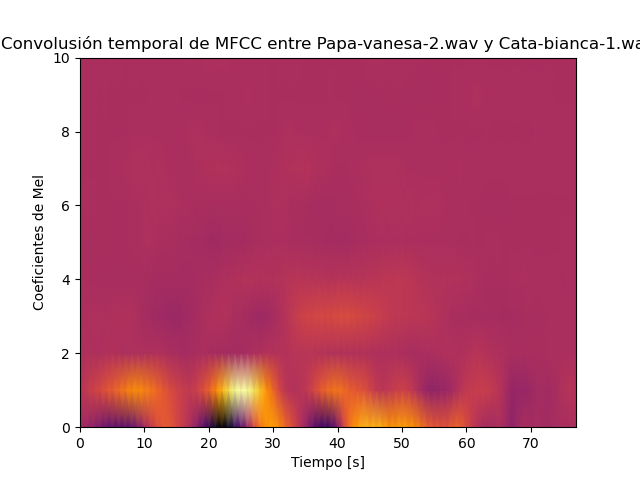

La distancia euclediana entre las diagonales de Cata-bianca-1 y Papa-vanesa-2 es 109


In [541]:

%matplotlib notebook
dista, convo = sum_distancia('Cata-bianca-1.wav', 'Papa-vanesa-2.wav', 721, 0.1, 'euclidean')

# megamatrix = np.zeros((32,32))

# sujetos = ['Papa', 'Cata', 'Isi', 'Mama']

# palabras = ['vanesa', 'bianca', 'diego', 'maria']

# for i in range(4):
#     #nombre_sujeto_fila = sujetos[i]
#     for j in range(4):
#         #nombre_sujeto_columna = sujetos[j]
#         for k in range(4):
#             #nombre_sujeto_fila = nombre_sujeto_fila + '-' + palabras[k]
#             for n in range(4):
#                 #nombre_sujeto_columna = nombre_sujeto_columna + '-' + palabras[n]
#                 for m in range(2):
#                     nombre_sujeto_fila = sujetos[i] + '-' + palabras[k] + '-' + str(m+1) + '.wav'
#                     for l in range(2): 
#                         nombre_sujeto_columna = sujetos[j] + '-' + palabras[n] + '-' + str(l+1) + '.wav'
#                         dista, convo = sum_distancia(nombre_sujeto_columna, nombre_sujeto_fila, 721, 0.1, 'euclidean')
#                         megamatrix[i*8 + k*2 + m, j*8 + n*2 + l] = dista
    

# workbook = xlsxwriter.Workbook('arrays.xlsx')
# worksheet = workbook.add_worksheet()

# row = 0

# for col, data in enumerate(megamatrix):
#     worksheet.write_column(row, col, data)

# workbook.close()


In [126]:
# opcion 1 es comparar entre una misma persona, mismas palabras
# opcion 2 es comparar enntre una misma persona, distintas palabras
# opcion 3 es comparar entre distintas personas, misma palabra
# opcion 4 es comparar entre distintas personas, distintas palabras
def matrix_comparasion(opcion, persona, versiones):
    if opcion == '1':
        matriz = np.zeros((4*int(versiones), 4*int(versiones)))
        print(matriz)
        #for i in range(2):
            
    
    
    #'{0} {1} {2} {3}'.format(EmployeeName, str(EmployeeNumber), UserType, SalaryType)
    
    , cmap = 'inferno'

In [127]:
matrix_comparasion('1', 'Cata', 2)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
